# **회귀분석**
> 3장 연습문제

- toc:true
- branch: master
- badges: true
- comments: true
- author: 김동준
- categories : ["R", "회귀분석"]

# 3.3) 어느 증권회사에서의 주가x와 종합주가지수y 분석

Base

In [2]:
x <- c(650, 670, 690, 650, 660, 650, 670, 660, 690, 710)
y <- c(210, 212, 217, 215, 216, 214, 220, 218, 220, 224)
lm33 <- lm(y~x)

### 1) 표본상관계수 구하기

In [3]:
cor(x,y)

[1] 0.7572034

### 2) 단순회귀선 추정, 산점도

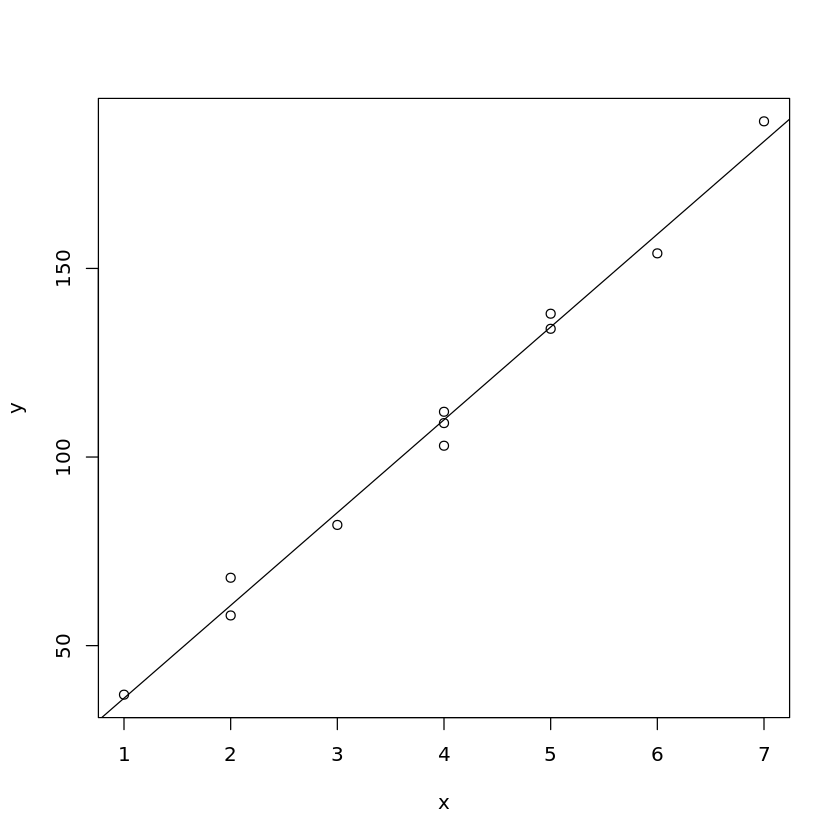

In [7]:
plot(y~x)
abline(lm(y~x))

### 3) MSE 계산 및 산점도와 비교

In [6]:
anova(lm33)
summary(lm33)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
x,1,88.52632,88.526316,10.75104,0.01120658
Residuals,8,65.87368,8.234211,NA,NA



Call:
lm(formula = y ~ x)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.6000 -1.9026  0.6895  1.4132  3.4000 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)   
(Intercept) 114.33684   31.20166   3.664  0.00636 **
x             0.15263    0.04655   3.279  0.01121 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.87 on 8 degrees of freedom
Multiple R-squared:  0.5734,	Adjusted R-squared:   0.52 
F-statistic: 10.75 on 1 and 8 DF,  p-value: 0.01121


### 4) 잔차를 구하고 합이 0이 되는 것을 확인

In [7]:
lm33$residuals

1          2          3          4          5          6          7 
-3.5473684 -4.6000000 -2.6526316  1.4526316  0.9263158  0.4526316  3.4000000 
         8          9         10 
 2.9263158  0.3473684  1.2947368

In [8]:
-3.5473684-4.6000000-2.6526316+1.4526316+0.9263158+0.4526316+3.4000000+2.9263158+0.3473684+1.2947368

[1] 8.881784e-16

In [9]:
sum(lm33$residuals)

[1] 1.554312e-15

$\to$ 둘다 0에 수렴하는 값

### 5) 잔차들의 x에 의한 가중합이 0이 됨을 보이기

In [13]:
res33 <- lm33$residuals
x*res33

1          2          3          4          5          6          7 
-2305.7895 -3082.0000 -1830.3158   944.2105   611.3684   294.2105  2278.0000 
         8          9         10 
 1931.3684   239.6842   919.2632

In [12]:
-2305.7895 -3082.0000 -1830.3158+944.2105+611.3684+294.2105+2278.0000+ 1931.3684 +239.6842 + 919.2632

[1] -1e-04

In [14]:
sum(x*res33)

[1] -4.547474e-13

$\to$ 둘다 0에 수렴하는 값

### 6) 잔차들의 yhat에 의한 가중합이 0이 됨을 보이기

In [16]:
res33*0.15263+(res33*(114.33684*x)) 

1          2          3          4          5          6          7 
-263637.22 -352386.84 -209272.93  107958.27   69902.07   33639.17  260459.84 
         8          9         10 
 220827.01   27404.79  105105.84

In [17]:
-263637.22 -352386.84 -209272.93 + 107958.27 +  69902.07 +  33639.17  +260459.84 + 220827.01  + 27404.79+  105105.84

[1] 1.164153e-10

In [18]:
sum(res33*0.15263+(res33*(114.33684*x)) )

[1] 4.365575e-11

$\to$ 둘다 0에 수렴하는 값

_______________________